## PROBLEM DEFINITION

### Bussiness case: 
#### Create a predictive model in such a way that the objective is to predict the ordinal variable “damage_grade”. This column presents the level of damage grade affected by the earthquake.

In [1]:
import numpy as np
import pandas as pd

import pprint

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import xgboost as xgb

from sklearn.metrics import classification_report, f1_score, confusion_matrix

from sklearn import ensemble, tree, linear_model, svm, naive_bayes, neural_network, neighbors

import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('train_values.csv')
target=pd.read_csv('train_labels.csv')

In [3]:
train = pd.merge(train, target, on = 'building_id', how = 'left')
train.set_index('building_id', drop = True, inplace = True)

### Domain Analysis

### Basic Checks

In [4]:
train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-

In [5]:
train

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
28830,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,2
94947,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
590882,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,2
201944,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,n,r,n,...,0,0,0,0,0,0,0,0,0,2
669485,17,715,2060,2,0,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
602512,17,51,8163,3,55,6,7,t,r,q,...,0,0,0,0,0,0,0,0,0,3


In [6]:
pd.set_option('display.max_columns',None)
train

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


In [7]:
train.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-

In [10]:
#Check for the missing values
(train.isnull().sum()/train.shape[0])*100
target = target[['damage_grade']]
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   damage_grade  260601 non-null  int64
dtypes: int64(1)
memory usage: 2.0 MB


### Exploratory Data Analysis

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64


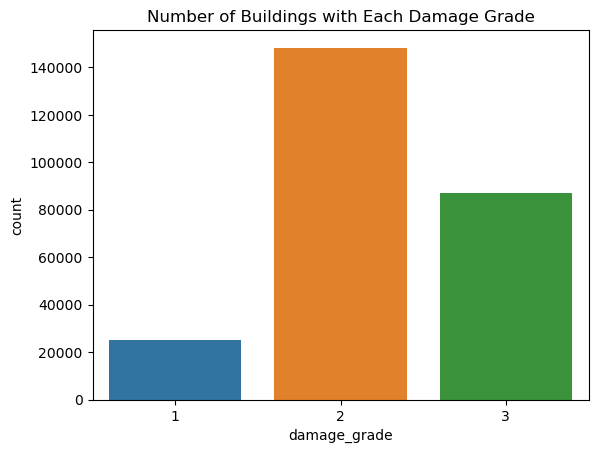

In [12]:
sns.countplot(train['damage_grade'])
print(train['damage_grade'].value_counts())
plt.title('Number of Buildings with Each Damage Grade');

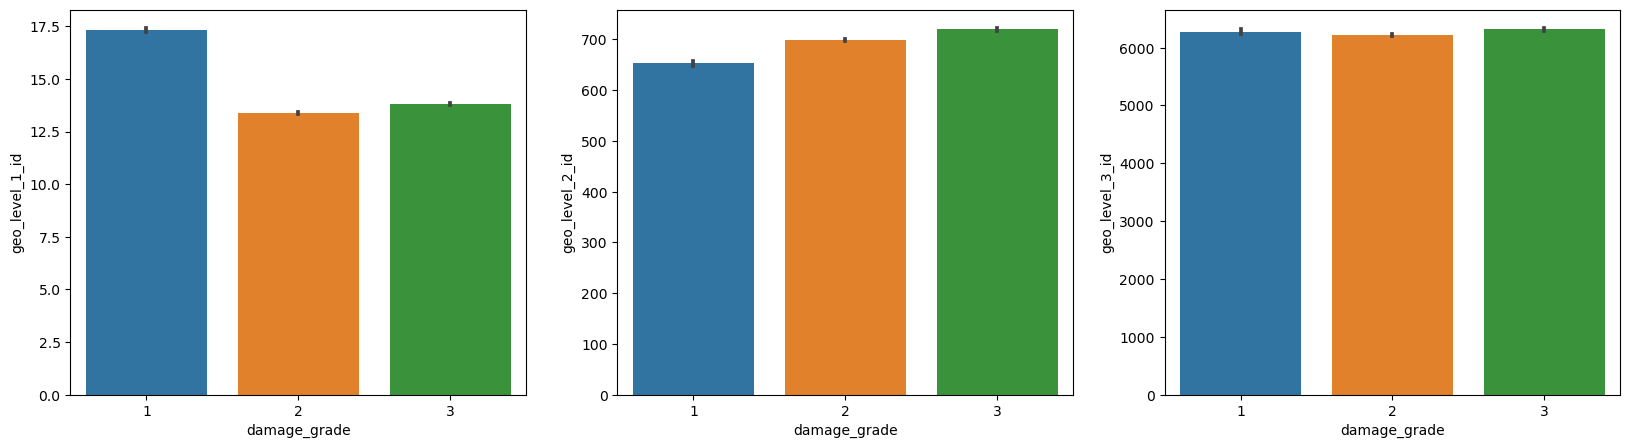

In [14]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.barplot(train['damage_grade'], train['geo_level_1_id'])

plt.subplot(1,3,2)
sns.barplot(train['damage_grade'], train['geo_level_2_id'])

plt.subplot(1,3,3)
sns.barplot(train['damage_grade'], train['geo_level_3_id'])

plt.show()

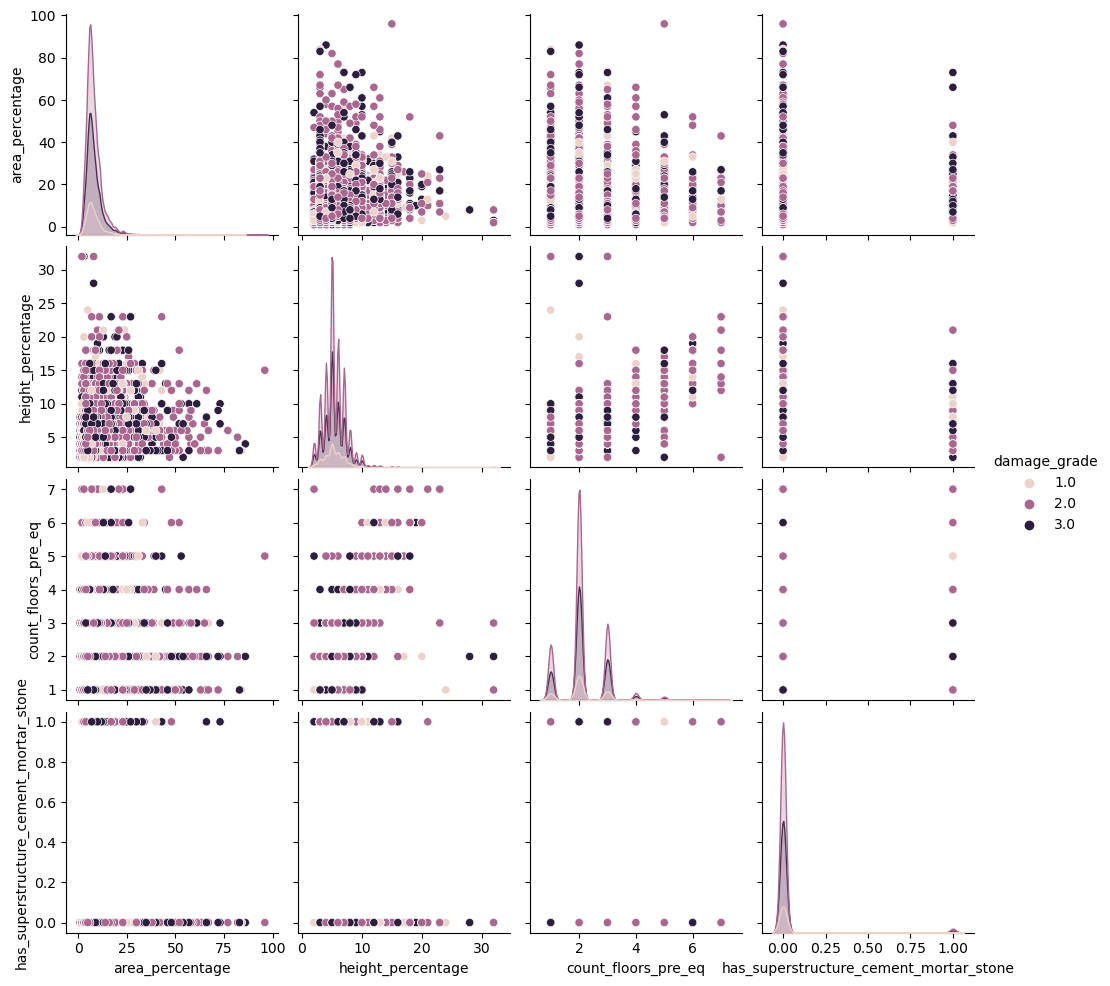

In [15]:
selected_features = ['foundation_type', 
                     'area_percentage', 
                     'height_percentage',
                     'count_floors_pre_eq',
                     'land_surface_condition',
                     'has_superstructure_cement_mortar_stone']

train_subset = train[selected_features]

sns.pairplot(train_subset.join(target), 
             hue='damage_grade')

<AxesSubplot:xlabel='damage_grade', ylabel='age'>

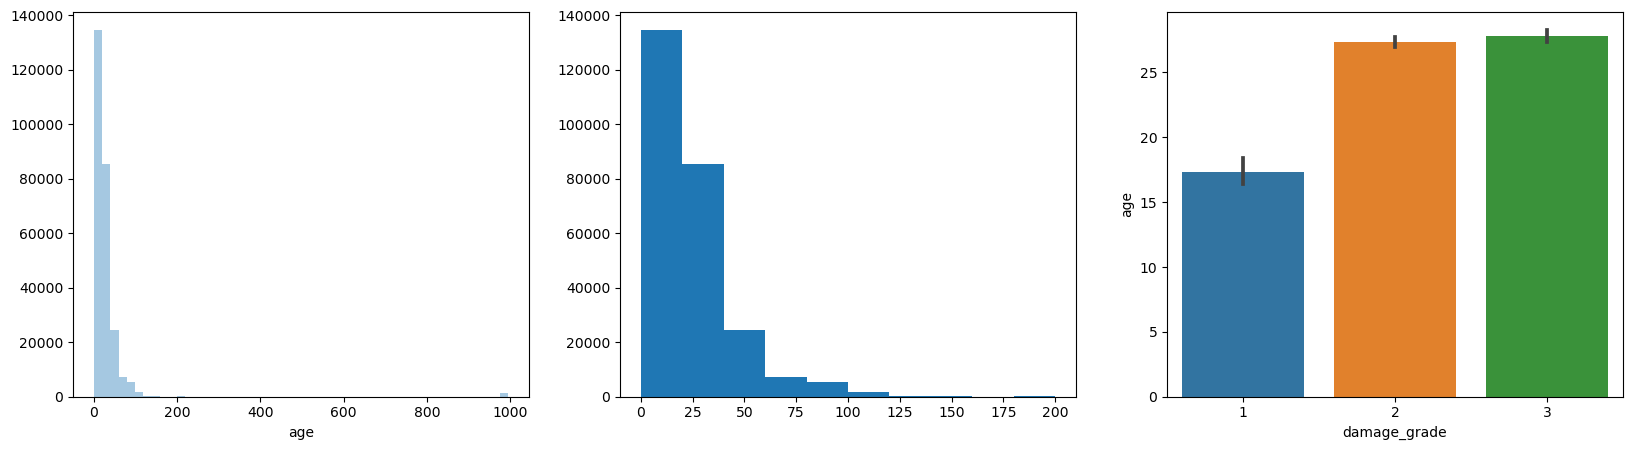

In [17]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.distplot(train['age'], kde = False)

plt.subplot(1,3,2)
plt.hist(train['age'], range=(0,200))

plt.subplot(1,3,3)
sns.barplot(train['damage_grade'],train['age'])

<AxesSubplot:xlabel='damage_grade', ylabel='count_floors_pre_eq'>

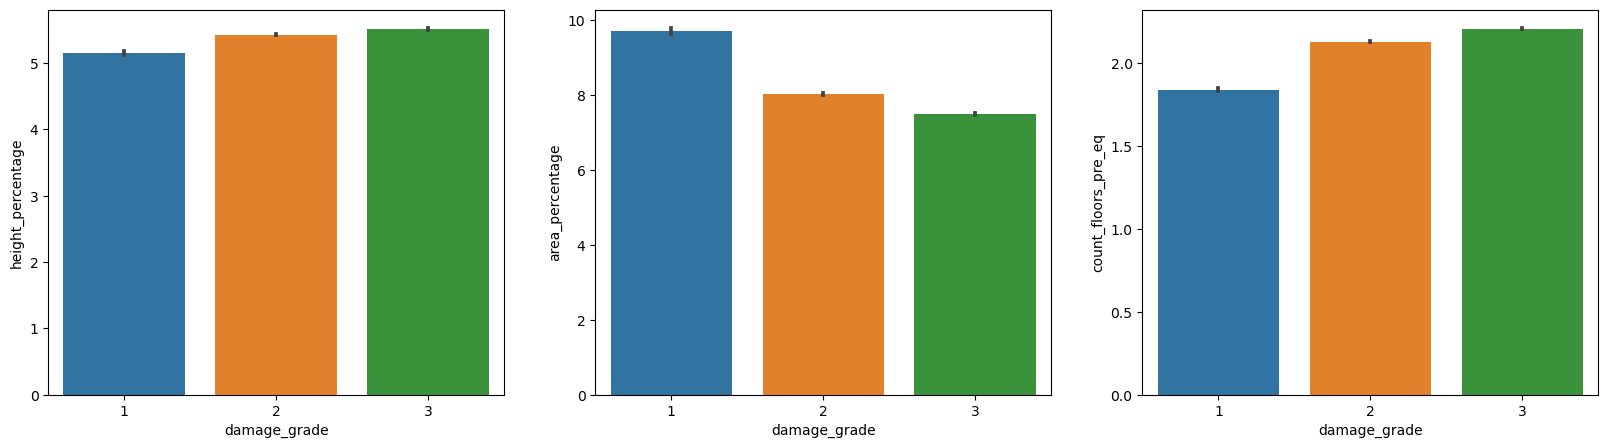

In [18]:
plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sns.barplot(train['damage_grade'], train['height_percentage'])

plt.subplot(1,3,2)
sns.barplot(train['damage_grade'], train['area_percentage'])

plt.subplot(1,3,3)
sns.barplot(train['damage_grade'], train['count_floors_pre_eq'])

In [ ]:
plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sns.barplot(train['damage_grade'], train['has_superstructure_adobe_mud'])

plt.subplot(1,3,2)
sns.barplot(train['damage_grade'], train['has_superstructure_mud_mortar_stone'])

plt.subplot(1,3,3)
sns.barplot(train['damage_grade'], train['has_superstructure_cement_mortar_brick'])

<AxesSubplot:>

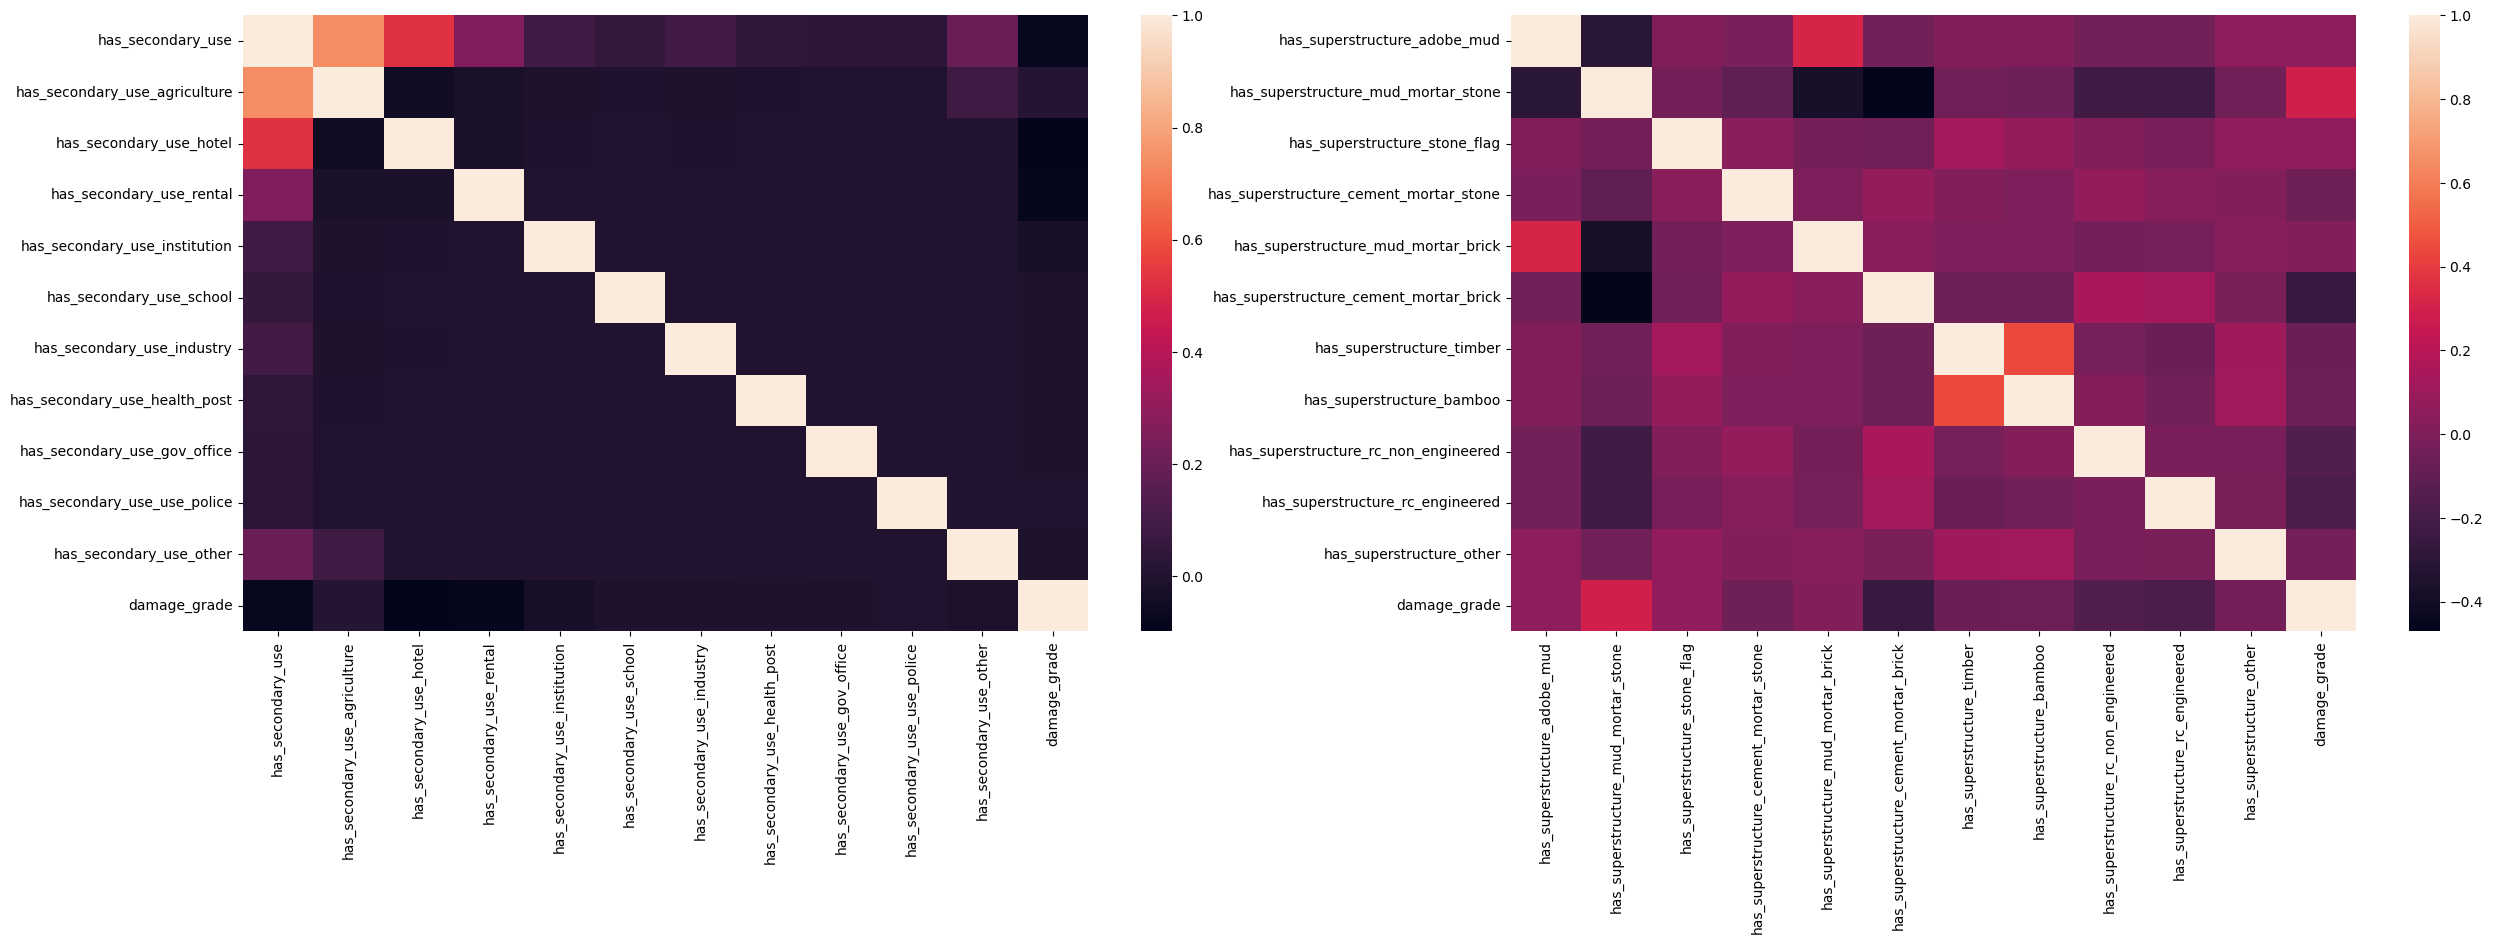

In [19]:
superstructure_cols = [x for x in train.columns if 'super' in x]
secondary_use_cols = [x for x in train.columns if 'secondary' in x]

superstructure_corr = train[superstructure_cols+['damage_grade']].corr()
secondary_use_corr = train[secondary_use_cols+['damage_grade']].corr()

plt.figure(figsize=(30,8))

plt.subplot(1,2,1)
sns.heatmap(secondary_use_corr)

plt.subplot(1,2,2)
sns.heatmap(superstructure_corr)

### Data Preprocessing

In [21]:
text_features = []
for column in train.columns:
    if train[column].dtype == 'object':
        text_features.append(column)

for feature in text_features:
    train = train.join(pd.get_dummies(train[feature], prefix = feature))
    
    train.drop(feature, axis = 1, inplace = True)


features = train.drop('damage_grade', axis = 1).columns

In [22]:
train.head()
train.shape

(260601, 69)

In [24]:
train.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
28830,8,900,2812,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
94947,21,363,8973,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
590882,22,418,10694,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
201944,11,131,1488,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


#### Our train dataset is ready for train/test split :

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(train[features], train.damage_grade, random_state = 42)

In [26]:
classifiers = [neighbors.KNeighborsClassifier(),
               tree.DecisionTreeClassifier(),
               ensemble.RandomForestClassifier(),
               ensemble.GradientBoostingClassifier(),]

def test_models(classifiers):
    
    for model in classifiers:
        
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        
        print(model)
        score = f1_score(Y_test, Y_pred, average='micro')
        print(score)
        print('############')
        
test_models(classifiers)

KNeighborsClassifier()
0.7035041672422526
############
DecisionTreeClassifier()
0.6560912342097589
############
RandomForestClassifier()
0.7127442403032954
############
GradientBoostingClassifier()
0.6809872450154257
############


In [27]:
rf_clf = ensemble.RandomForestClassifier()
knn_clf = neighbors.KNeighborsClassifier()

rf_clf.fit(X_train, Y_train)
y_pred_rf = rf_clf.predict(X_test)

knn_clf.fit(X_train, Y_train)
y_pred_knn = knn_clf.predict(X_test)

<AxesSubplot:xlabel='Predicted', ylabel='Real'>

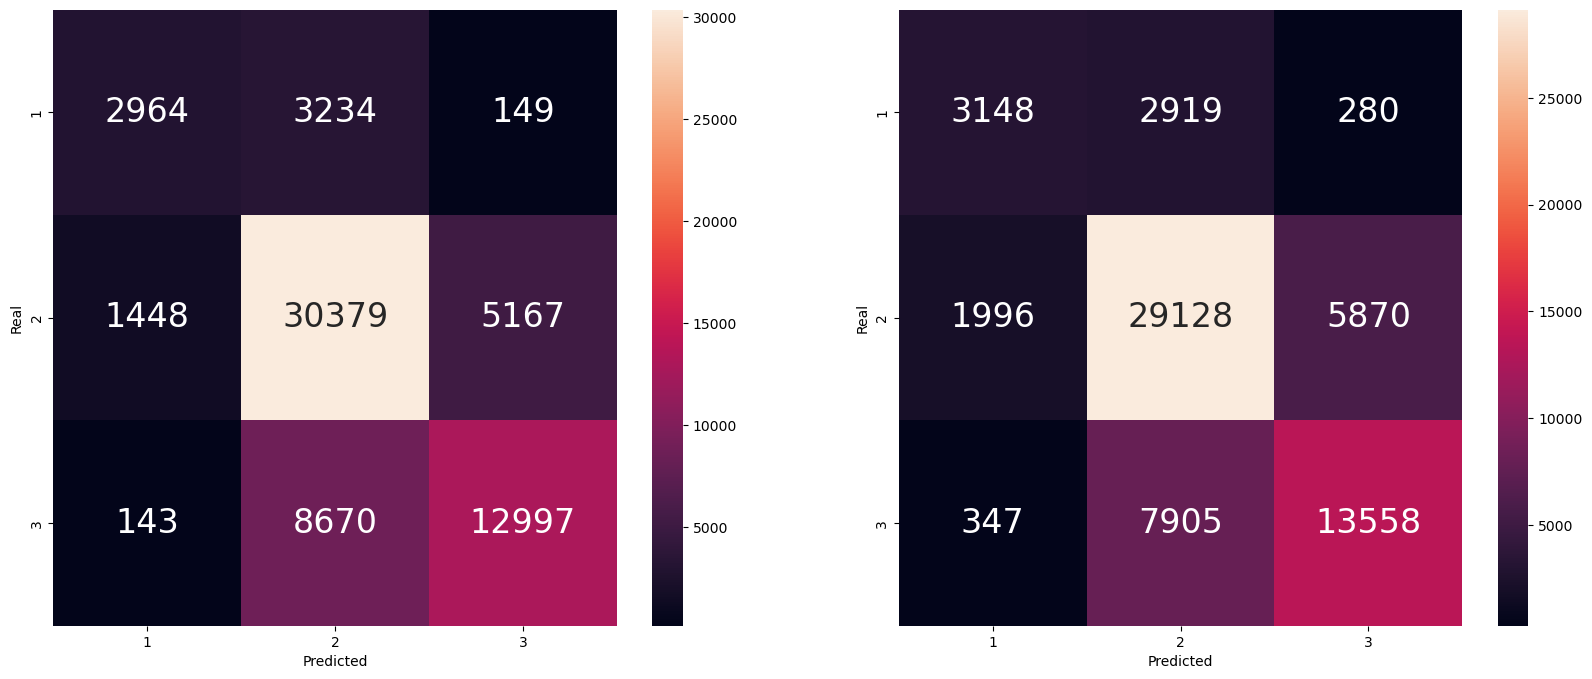

In [28]:
df_cm_rf = pd.DataFrame(confusion_matrix(Y_test, y_pred_rf), columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm_rf.index.name = 'Real'
df_cm_rf.columns.name = 'Predicted'

df_cm_knn = pd.DataFrame(confusion_matrix(Y_test, y_pred_knn), columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm_knn.index.name = 'Real'
df_cm_knn.columns.name = 'Predicted'

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.heatmap(df_cm_rf, annot=True, fmt='d', annot_kws={"size": 24})

plt.subplot(1,2,2)
sns.heatmap(df_cm_knn, annot=True, fmt='d', annot_kws={"size": 24})

In [29]:
print("Random Forest")
print(classification_report(Y_test, y_pred_rf))
print('############################################################')
print("KNeighbors")
print(classification_report(Y_test, y_pred_knn))

Random Forest
              precision    recall  f1-score   support

           1       0.65      0.47      0.54      6347
           2       0.72      0.82      0.77     36994
           3       0.71      0.60      0.65     21810

    accuracy                           0.71     65151
   macro avg       0.69      0.63      0.65     65151
weighted avg       0.71      0.71      0.71     65151

############################################################
KNeighbors
              precision    recall  f1-score   support

           1       0.57      0.50      0.53      6347
           2       0.73      0.79      0.76     36994
           3       0.69      0.62      0.65     21810

    accuracy                           0.70     65151
   macro avg       0.66      0.63      0.65     65151
weighted avg       0.70      0.70      0.70     65151



In [32]:
from IPython.display import display_html 

In [33]:
importance_rf = pd.DataFrame({"Features":features, "Importance_RF":rf_clf.feature_importances_}).sort_values(by='Importance_RF', ascending = False).head(15)
importance_knn = pd.DataFrame({"Features":features, "Importance_KNN":knn_clf.feature_names_in_}).sort_values(by='Importance_KNN', ascending = False).head(15)

RF_styler = importance_rf.style.set_table_attributes("style='display:inline'").set_caption('Top 15 Random Forest importance')
KNN_styler = importance_knn.style.set_table_attributes("style='display:inline'").set_caption('Top 15 KNeighbors importance')

display_html(RF_styler._repr_html_()+KNN_styler._repr_html_(), raw=True)

,Features,Importance_RF
2,geo_level_3_id,0.153697
0,geo_level_1_id,0.135089
1,geo_level_2_id,0.134964
4,age,0.120122
5,area_percentage,0.113225
6,height_percentage,0.055060
18,count_families,0.024252
3,count_floors_pre_eq,0.016745
35,foundation_type_r,0.015709
8,has_superstructure_mud_mortar_stone,0.013039


<AxesSubplot:xlabel='damage_grade', ylabel='foundation_type_r'>

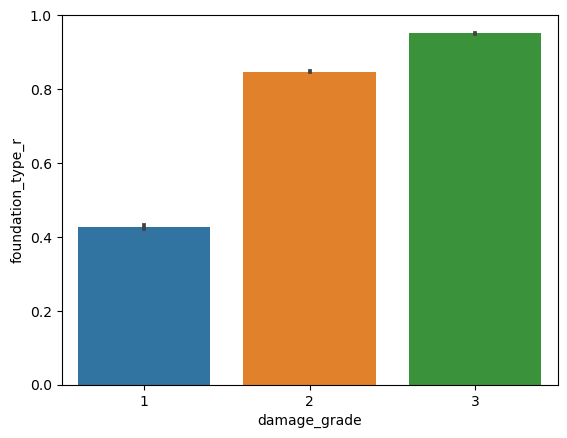

In [34]:
train['foundation_type_r'].value_counts()
sns.barplot(train['damage_grade'], train['foundation_type_r'])

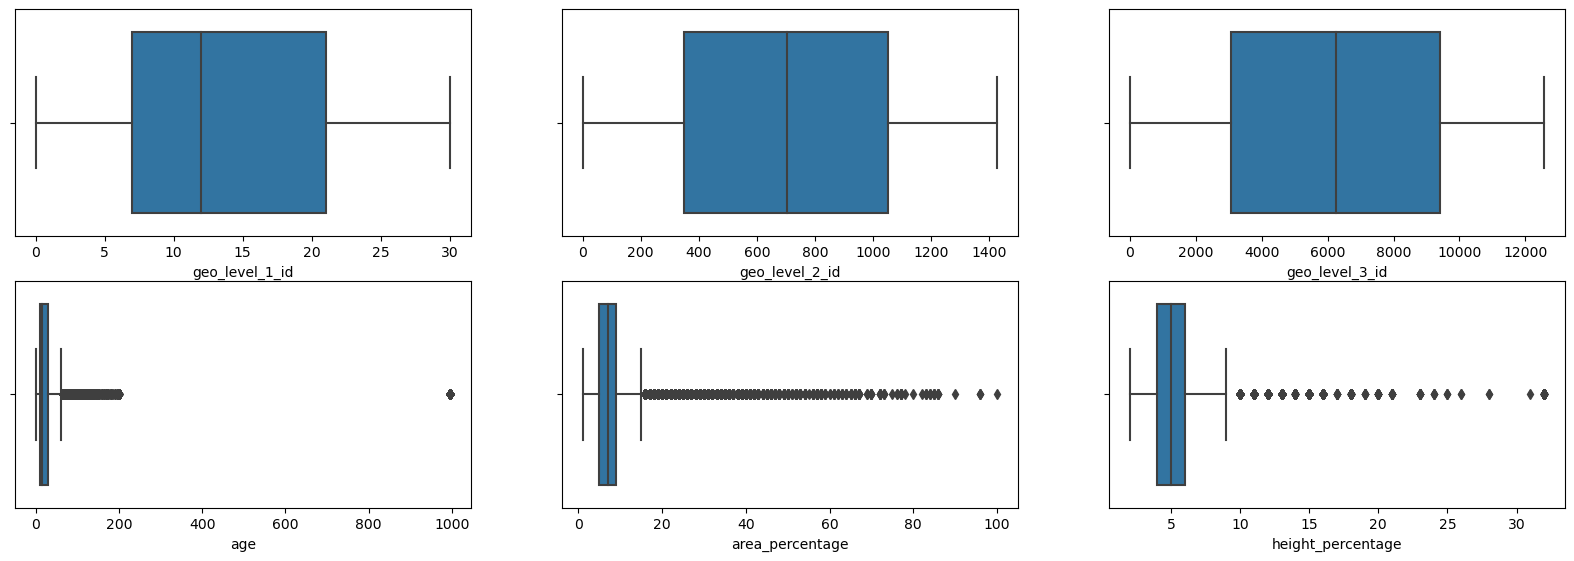

In [35]:
num_features = ['geo_level_1_id','geo_level_2_id','geo_level_3_id','age','area_percentage','height_percentage']
i = 1

plt.figure(figsize=(20,10))

for col in num_features:
    plt.subplot(3,3,i)
    ax=sns.boxplot(train[col].dropna())
    plt.xlabel(col)
    i+=1
plt.show()